In [1]:
import numpy as np
import skimage
from skimage import data
import matplotlib.pyplot as plt

In [2]:
def image_show(image, cmap='gray', **kwargs):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
    ax.imshow(image, cmap=cmap)
    ax.axis('off')
    return fig, ax


def image_show_multi(imlist, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8*ncols, 8*nrows))
    i=0
    for r in range(nrows):
        for c in range(ncols):
            ax[i].imshow(imlist[i])
            ax[i].axis('off')
            i=i+1
            
    return fig, ax

(303, 384)
(303, 384)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


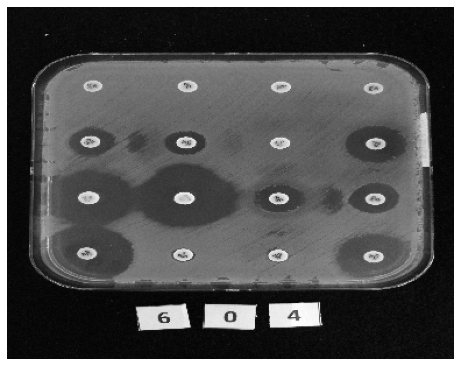

In [9]:
import numpy as np
import skimage
from skimage import data
import matplotlib.pyplot as plt
import cv2
from imageio import imread, imwrite
from PIL import Image

%matplotlib inline

img_path = "../PFA/tests/images/test0.jpg"
img = imread(img_path)
from skimage import color
from skimage import io

imgGray = color.rgb2gray(img)

img1= cv2.resize(imgGray,(384,303))
coins = data.coins()

print(np.shape(coins))
print(np.shape(img1))

a=image_show(img1)
print(type(img1))
print(type(coins))

/home/oussama/anaconda3/envs/PFA/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `selem` is a deprecated argument name for `median`. It will be removed in version 1.0. Please use `footprint` instead.
  


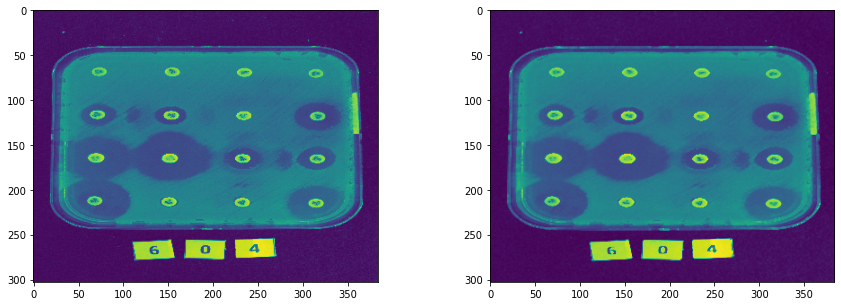

In [10]:
from skimage import filters
coins_desnoised= filters.median(img1, selem=np.ones((2,2)))
f, (ax0,ax1) = plt.subplots(1,2,figsize=(15,5))
ax0.imshow(img1)
ax1.imshow(coins_desnoised)

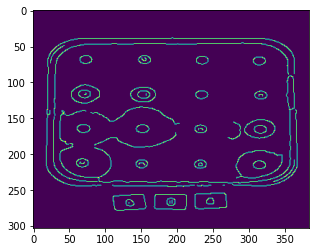

In [11]:
from skimage import feature 
edges = skimage.feature.canny(img1,sigma=2)
plt.imshow(edges);

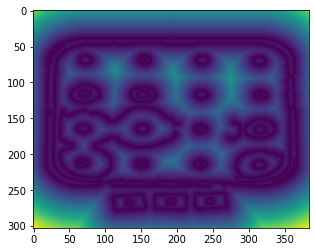

In [12]:
from scipy.ndimage import distance_transform_edt
dt= distance_transform_edt(~edges)
plt.imshow(dt);

/home/oussama/anaconda3/envs/PFA/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  
/home/oussama/anaconda3/envs/PFA/lib/python3.7/site-packages/skimage/_shared/utils.py:157: RuntimeWarning: When min_distance < 1, peak_local_max acts as finding image > max(threshold_abs, threshold_rel * max(image)).
  return func(*args, **kwargs)


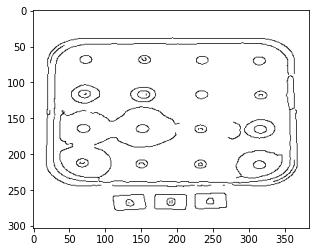

In [13]:
from skimage import feature 
local_max = feature.peak_local_max(dt, indices=False,min_distance=0)
plt.imshow(local_max,cmap='gray');

In [14]:
peak_idx = feature.peak_local_max(dt, indices=True,min_distance=5)
peak_idx[:5]

/home/oussama/anaconda3/envs/PFA/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  """Entry point for launching an IPython kernel.


array([[ 95, 275],
       [ 88, 195],
       [ 84, 114],
       [122, 275],
       [209, 195]])

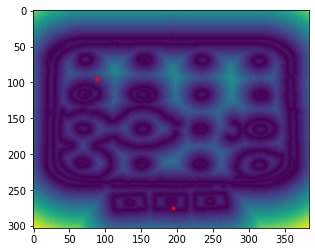

In [15]:
plt.plot(peak_idx[1],peak_idx[0],'r.')
plt.imshow(dt);

In [16]:
from skimage import measure 
markers = measure.label(local_max)

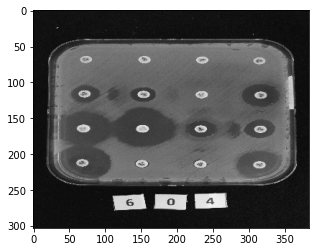

In [17]:
from skimage import color 
from skimage.segmentation import watershed
from skimage import morphology ,segmentation
labels = watershed(-dt,markers)
plt.imshow(segmentation.mark_boundaries(img1,labels));


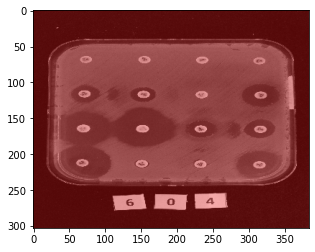

In [18]:
plt.imshow(color.label2rgb(labels, image=img1))

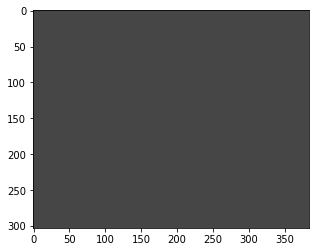

In [19]:
plt.imshow(color.label2rgb(labels, image=img1 ,kind='avg'), cmap='gray');
#measure.regionprops?


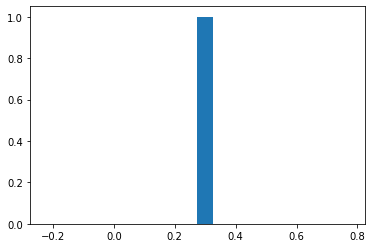

In [20]:
regions = measure.regionprops(labels ,intensity_image=img1)      
region_means=[r.mean_intensity for r in regions]
plt.hist(region_means ,bins=20);

In [21]:
from sklearn.cluster import KMeans 
model = KMeans(n_clusters=2)

region_means = np.array(region_means).reshape(-1,1)

model.fit(region_means)
print(model.cluster_centers_)

In [22]:
model.fit(region_means) 
print(model.cluster_centers_)

ValueError: n_samples=1 should be >= n_clusters=2.

In [ ]:
bg_fg_labels = model.predict(region_means)
bg_fg_labels

In [ ]:
classified_labels = labels.copy()
for bg_fg, region in zip(bg_fg_labels,regions):
    classified_labels[tuple(region.coords.T)] = bg_fg

In [ ]:
plt.imshow(color.label2rgb(classified_labels, image=img1));